In [8]:
import sys
sys.path.append('cocoapi/PythonAPI/')
from IPython.core.display import display
import matplotlib.pyplot as plt
import torch
from checkpoint import load_checkpoint

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

chkpt = torch.load('checkpoints/glove_baseline_3.pth.tar', map_location=str(device))

In [10]:
display(chkpt.keys())

dict_keys(['epoch', 'metrics', 'encoder', 'decoder', 'encoder_optimizer', 'decoder_optimizer'])

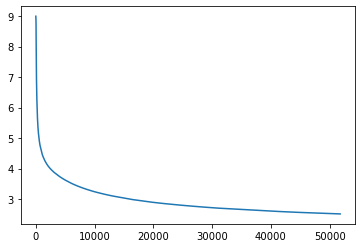

In [51]:
epoch_losses = chkpt['metrics']['epoch_losses']

def avg_losses(epoch_losses):
    flatten = lambda lst: [item for sublst in lst for item in sublst]
    all_losses = flatten(epoch_losses)
    avg_all_losses = []
    prev_losses_sum = 0
    for i, loss in enumerate(all_losses):
        avg_loss = (loss + prev_losses_sum)/(i+1)
        avg_all_losses.append(avg_loss)   
        prev_losses_sum += loss
        
    return avg_all_losses

def create_losses_plot(ax, losses):
    pass
    
    

plt.plot(avg_losses(epoch_losses))
plt.show()